read and split data

In [1]:
from sklearn.datasets import make_circles
from pandas import DataFrame
from sklearn.model_selection import train_test_split
rs = 0
X, y = make_circles(300, noise=0.1, random_state=rs)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=rs)
#dataset = make_circles(n_samples=100, shuffle=True, noise=None, random_state=None, factor=0.8)



plot 2D

In [2]:
import numpy as np
from sklearn.base import clone
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def plotDataset(X, y):
  for label in np.unique(y):
    plt.scatter(X[y == label, 0], X[y == label, 1], label=label)
  plt.legend()
  plt.show()


def plotEstimator(trX, trY, teX, teY, estimator, title=''):
  estimator = clone(estimator).fit(trX, trY)
  h = .02
  x_min, x_max = X_test[:, 0].min() - .5, X_test[:, 0].max() + .5
  y_min, y_max = X_test[:, 1].min() - .5, X_test[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  Z = estimator.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
  plt.scatter(teX[:, 0], teX[:, 1], c=teY, cmap=cm_bright, edgecolors='k', alpha=0.6)
  # plt.legend()
  plt.title(title)
  plt.show()

DECISION TREE

0.6060606060606061


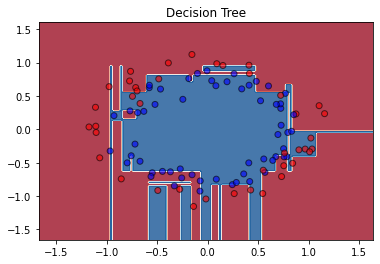

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


estimator = DecisionTreeClassifier(random_state=rs)
estimator.fit(X_train, y_train)
predY = estimator.predict(X_test)
dtAccuracy = accuracy_score(y_test, predY)
print(dtAccuracy)
plotEstimator(X_train, y_train, X_test, y_test, estimator, 'Decision Tree')

Bagging

accuracy: {0.6363636363636364}


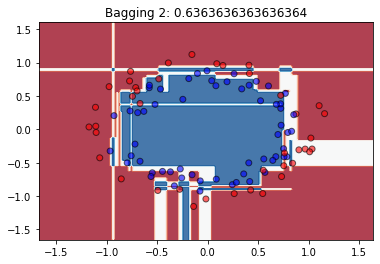

accuracy: {0.7373737373737373}


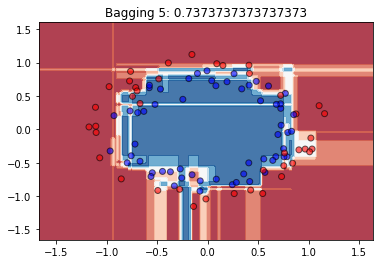

accuracy: {0.7272727272727273}


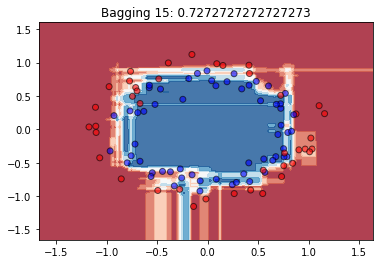

accuracy: {0.7474747474747475}


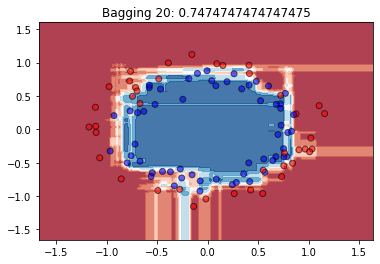

In [ ]:
"""from sklearn.ensemble import BaggingClassifier

num_estimators = [ 2, 5, 15, 20]
for nEst in num_estimators:
  estimators = BaggingClassifier(base_estimator = estimator,n_estimators=nEst, random_state=rs)
  score = estimators.fit(X_train, y_train).score(X_test, y_test)
  print("accuracy:",{score})
  plotEstimator(X_train, y_train, X_test, y_test, estimators, f'Bagging {nEst}: {score}')"""

# **bagging from scratch**

In [4]:
class baggingclassifier1(object):
  def __init__(self,num_estimators=2,random_state=0,voting="hard"):
    self.accs = []
    self.estimators =[]
    self.num_estimators =num_estimators
    self.random_state = random_state
    self.voting = voting
  def __subset(self,X,y,ratio=1.0):
    data_size=len(X)
    n_sample=round(data_size*ratio)
    idx=np.random.randint(data_size,size=n_sample)
    sample_X=np.take(X, idx , axis=0)
    sample_y=np.take(y, idx , axis=0)
    return sample_X , sample_y
  def fit(self, X ,y):
    self.estimators, self.accs =[],[]
    for __ in range(self.num_estimators):
       X__, y__=self.__subset(X,y,1)
       self.estimators.append(DecisionTreeClassifier(random_state=self.random_state).fit(X__,y__))
  def predict (self,X,y=None):
    predictions=[]
    for estimator in self.estimators:
      if self.voting =="hard":
          py=estimator.predict(X)
      else:
          py=estimator.predict_proba(X)
      if y is not None and self.voting=="hard":
          self.accs.append(accuracy_score(py,y))
      predictions.append(py)  
    predictions=np.array(predictions)  
    t=np.zeros(predictions[0].shape)   
    for pred in predictions: 
        t +=pred 
    predictions = t/self.num_estimators  
    return predictions

  def score(self):
     if self.accs:
       return np.mean(self.accs)
  #def plotEstimator(trX, trY, teX, teY, estimator, title=''):
  def plotEstimator(self, teX, teY, title=''):

    #estimator = clone(estimator).fit(trX, trY)
    h = .02
    x_min, x_max = X_test[:, 0].min() - .5, X_test[:, 0].max() + .5
    y_min, y_max = X_test[:, 1].min() - .5, X_test[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    temp=self.voting
    self.voting='soft'
    Z = self.predict(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    self.voting='temp'
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
    plt.scatter(teX[:, 0], teX[:, 1], c=teY, cmap=cm_bright, edgecolors='k', alpha=0.6)
    # plt.legend()
    plt.title(title)
    plt.show()       



In [5]:
est=baggingclassifier1(num_estimators=4,random_state=rs,voting="hard")
est.fit(X_train, y_train)

accuracy: {0.7095959595959597}


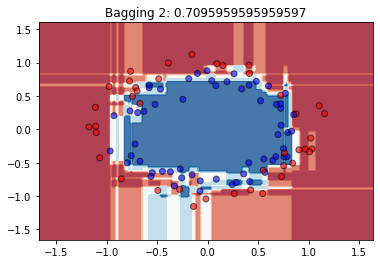

accuracy: {0.75}


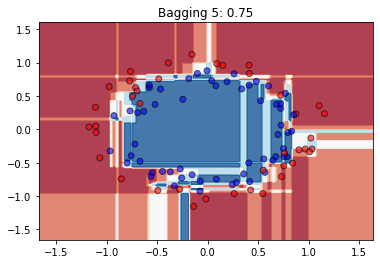

accuracy: {0.73989898989899}


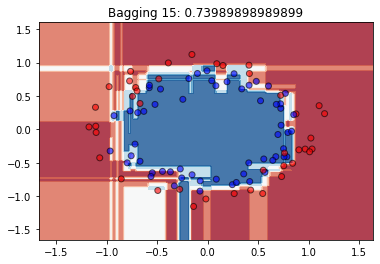

accuracy: {0.7196969696969697}


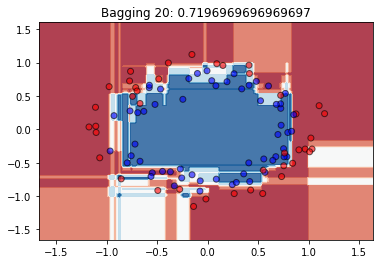

In [8]:
num_estimators = [ 2, 5, 15, 20]
for nEst in num_estimators:
  est=baggingclassifier1(num_estimators=4,random_state=rs,voting="hard")
  est.fit(X_train, y_train)
  est.predict(X_test, y_test)
  score=est.score()
  print("accuracy:",{score})
  #plotEstimator( X_train, y_train,X_test, y_test, estimators,f'Bagging {nEst}: {score}')
  est.plotEstimator(X_test, y_test,f'Bagging {nEst}: {score}')

BOOSTING

Results for 10 n_estimaotrs
Results for 0.1 learning_rate
accuracy: 0.6613636363636364


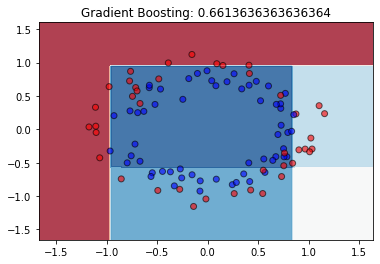

Results for 10 n_estimaotrs
Results for 1 learning_rate
accuracy: 0.6763636363636364


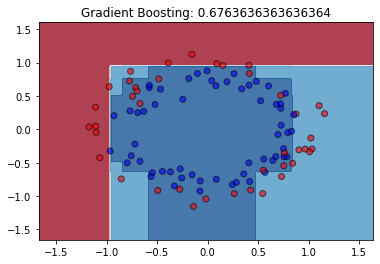

Results for 10 n_estimaotrs
Results for 2 learning_rate
accuracy: 0.6468181818181818


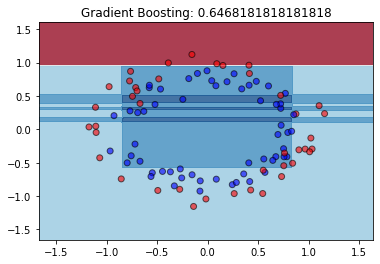

Results for 50 n_estimaotrs
Results for 0.1 learning_rate
accuracy: 0.6613636363636364


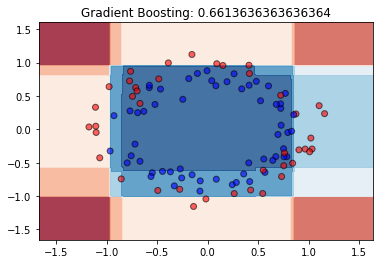

Results for 50 n_estimaotrs
Results for 1 learning_rate
accuracy: 0.6813636363636364


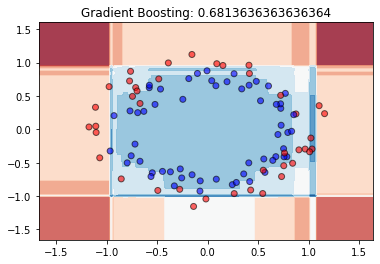

Results for 50 n_estimaotrs
Results for 2 learning_rate
accuracy: 0.6272727272727272


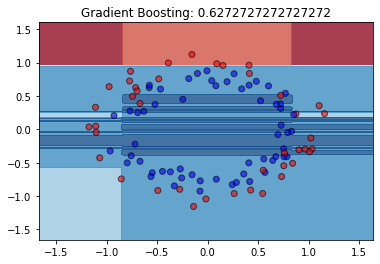

Results for 100 n_estimaotrs
Results for 0.1 learning_rate
accuracy: 0.6713636363636363


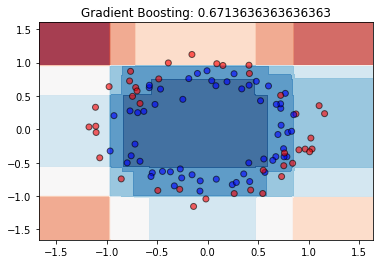

Results for 100 n_estimaotrs
Results for 1 learning_rate
accuracy: 0.6913636363636365


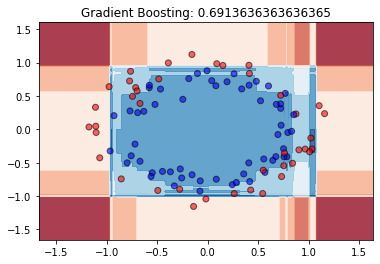

Results for 100 n_estimaotrs
Results for 2 learning_rate
accuracy: 0.5877272727272727


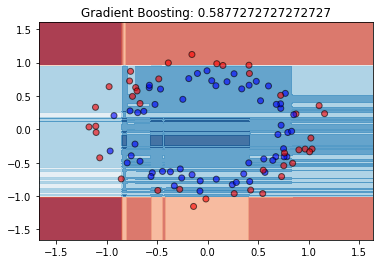

Results for 200 n_estimaotrs
Results for 0.1 learning_rate
accuracy: 0.6663636363636364


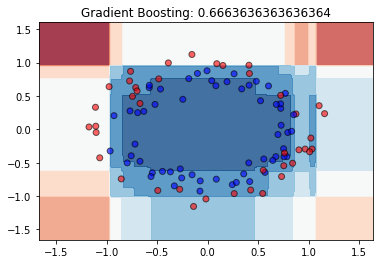

Results for 200 n_estimaotrs
Results for 1 learning_rate
accuracy: 0.6863636363636363


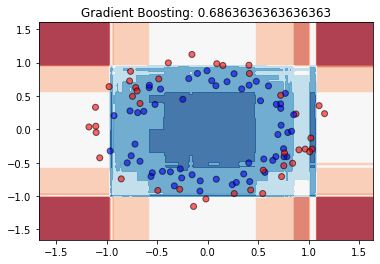

Results for 200 n_estimaotrs
Results for 2 learning_rate
accuracy: 0.5272727272727271


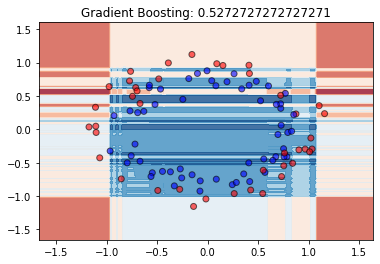

In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import  KFold, cross_val_score
import warnings
warnings.filterwarnings("ignore")
k_folds = KFold(n_splits=20, random_state=12)

num_estimators = [10,50,100, 200]
lr = [0.1 ,1 ,2 ]
for i in num_estimators :
  for j in lr:
    ada_boost = AdaBoostClassifier(n_estimators=i, random_state=12 ,learning_rate=j)
    results = cross_val_score(ada_boost, X_train, y_train, cv=k_folds)
    print("Results for {} n_estimaotrs".format(i))
    print("Results for {} learning_rate".format(j))   
    print("accuracy:",results.mean())
    plotEstimator(X_train, y_train,  X_test, y_test, ada_boost, f'Gradient Boosting: {results.mean()}')

# bootstrap

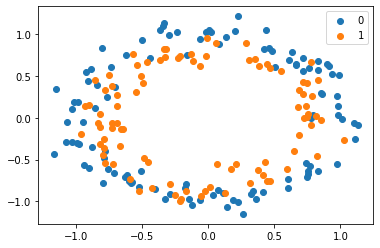

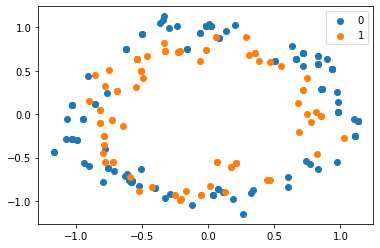

In [ ]:
from sklearn.utils import resample


bsX, bsY = resample(X_train, y_train, random_state=rs)
plotDataset(X_train, y_train)
plotDataset(bsX, bsY)